First of all we will import all the pre-built libraries that we require !!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import metrics, ensemble, linear_model
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

C:\Users\Arpit\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [7]:
features = pd.read_csv("features.csv")
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sampleSubmission.csv')

We will merge features and stores data together.

In [525]:
features_stores = features.merge(stores, how='inner', on = "Store")

In [526]:
features_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [527]:
train_df = train.merge(features_stores, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [528]:
test_df = test.merge(features_stores, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [529]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [530]:
test_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221


Now comes the EDA part.

In [531]:
train_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


Converting date columns to datetime !

In [532]:
features_stores = features.merge(stores, how='inner', on = "Store")

In [533]:
features_stores['Date'] = pd.to_datetime(features_stores['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

Adding some basic time features !!

In [534]:
features_stores['Day'] = features_stores['Date'].dt.day
features_stores['Week'] = features_stores['Date'].dt.isocalendar().week
features_stores['Month'] = features_stores['Date'].dt.month
features_stores['Year'] = features_stores['Date'].dt.year

In [535]:
features_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
 14  Day           8190 non-null   int64         
 15  Week          8190 non-null   UInt32  

In [536]:
train_df = train.merge(features_stores, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [537]:
test_df = test.merge(features_stores, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [538]:
df_weeks = train_df.groupby('Week').sum()

In [539]:
df_weeks

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Day,Month,Year
Week,,,,,,,,,,,,,,,,,
1,130899,260501,8.773121e+07,0,222343.25,18872.529,1.499397e+07,6.700739e+07,3.534867e+05,3078155.61,15506769.87,1.008962e+06,46396.361,806775433,38348,5903,11873906
2,131036,260045,8.269676e+07,0,204005.74,19098.337,1.019858e+07,2.923531e+07,2.185133e+05,1565390.83,11416226.10,1.007821e+06,46330.934,805424262,79550,5894,11855800
3,130031,259381,8.273564e+07,0,222547.92,19167.202,7.210967e+06,9.824350e+06,2.140790e+05,1942054.54,8410008.53,1.006852e+06,46151.605,804330161,120458,5877,11821606
4,129971,259111,7.943483e+07,0,221326.56,19229.283,4.418107e+06,5.170161e+06,2.132158e+05,296603.35,7927497.89,1.006330e+06,46135.250,803454747,161436,5871,11809533
5,195904,392036,1.419895e+08,0,317172.19,27489.729,1.140734e+08,8.936033e+06,4.485532e+05,90821661.61,18580144.27,1.507341e+06,71739.976,1213767653,35410,17716,17813460
6,196850,394786,1.456823e+08,8895,308692.32,27771.111,3.388102e+07,1.374891e+07,2.230950e+05,28678531.29,18188378.72,1.514441e+06,71962.692,1219143417,97800,17790,17887890
7,197602,396508,1.471902e+08,0,362493.21,28048.496,3.491820e+07,2.495659e+07,5.532842e+04,19735801.65,18139157.65,1.520852e+06,72321.353,1221309371,160692,17858,17956249
8,195853,390108,1.338659e+08,0,369896.71,28063.010,2.793795e+07,1.755367e+07,1.337054e+04,8544934.40,17424405.80,1.507838e+06,71597.140,1210785752,221090,17688,17785294
9,197097,393893,1.407131e+08,0,388853.51,29131.976,4.981556e+07,4.794496e+06,8.514402e+04,34262956.69,10572056.03,1.517037e+06,71990.147,1217495757,32532,26676,17881858


Now we will have some visualisations.

In [540]:
x = df_weeks.index

In [541]:
y = df_weeks.Weekly_Sales

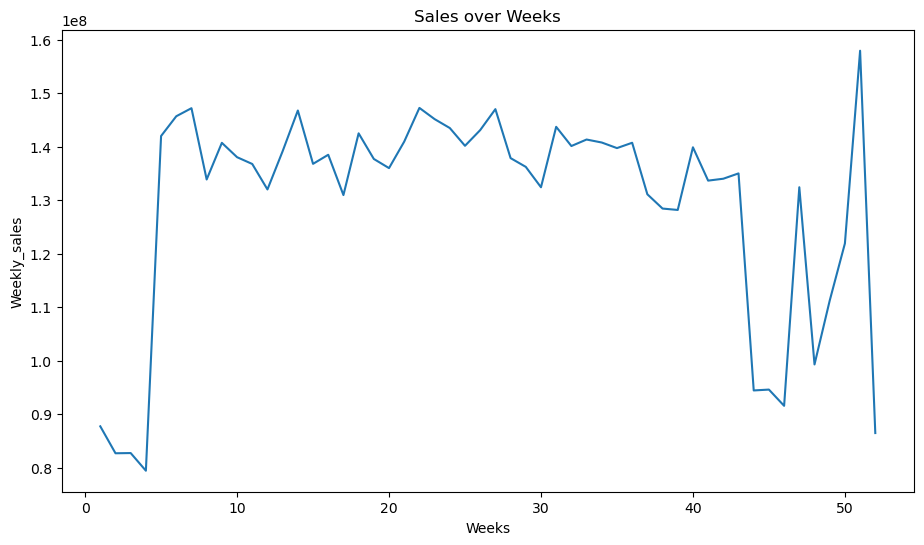

In [542]:
figure = plt.figure(figsize = (11,6))
plt.plot(x,y)
plt.xlabel('Weeks')
plt.ylabel('Weekly_sales')
plt.title('Sales over Weeks')
plt.show()

From the above figure i analyse that the sales across the year were quite stable with a plunge around the week 42 or 43 , and a recovery for the holidays .

Now we will have the visulaisation upon the relationship between markdown and the sales.

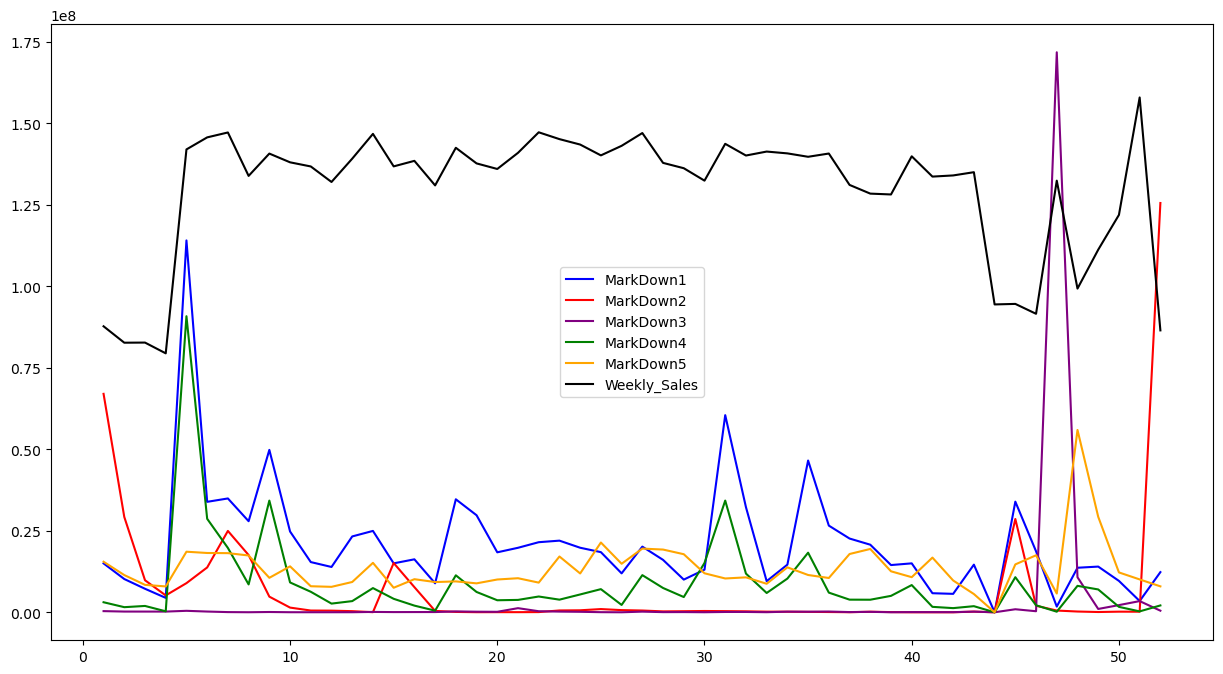

In [543]:
figure = plt.figure(figsize = (15,8))
plt.plot(x , df_weeks['MarkDown1'], color = 'blue' , label = 'MarkDown1')
plt.plot(x , df_weeks['MarkDown2'], color = 'red' , label = 'MarkDown2')
plt.plot(x , df_weeks['MarkDown3'], color = 'purple' , label = 'MarkDown3')
plt.plot(x , df_weeks['MarkDown4'], color = 'green' , label = 'MarkDown4')
plt.plot(x , df_weeks['MarkDown5'], color = 'orange' , label = 'MarkDown5')
plt.plot(x , df_weeks['Weekly_Sales'], color = 'black' , label = 'Weekly_Sales')
plt.legend()
plt.show()

Now let see the Mean across the years.

In [544]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,12,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,19,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,26,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,28,39,9,2012
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,5,40,10,2012
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,12,41,10,2012
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,19,42,10,2012


In [545]:
Weekly_Sales = train_df.groupby(['Year','Week'], as_index = False).agg({'Weekly_Sales': ['mean', 'median']})

In [546]:
Weekly_Sales2010 = train_df.loc[train_df['Year']==2010].groupby(['Week']).agg({"Weekly_Sales": ['mean','median']})

In [547]:
Weekly_Sales2011 = train_df.loc[train_df['Year']==2011].groupby(['Week']).agg({"Weekly_Sales": ['mean','median']})

In [548]:
Weekly_Sales2012 = train_df.loc[train_df['Year']==2012].groupby(['Week']).agg({"Weekly_Sales": ['mean','median']})

In [549]:
Weekly_Sales2010.head() , Weekly_Sales2011.head() , Weekly_Sales2012.head()

(      Weekly_Sales          
               mean    median
 Week                        
 5     16836.121997  7904.690
 6     16352.056032  8365.095
 7     16216.658979  8411.250
 8     14899.549688  7235.800
 9     15921.015727  7717.975,
       Weekly_Sales          
               mean    median
 Week                        
 1     14599.244973  6384.990
 2     13891.283484  5961.710
 3     13932.367385  6139.315
 4     13566.239462  6227.980
 5     15773.448776  7312.115,
       Weekly_Sales         
               mean   median
 Week                       
 1     15121.231736  6586.37
 2     14168.266514  5914.86
 3     14221.357405  6146.31
 4     13494.232612  5785.84
 5     15480.553608  6859.65)

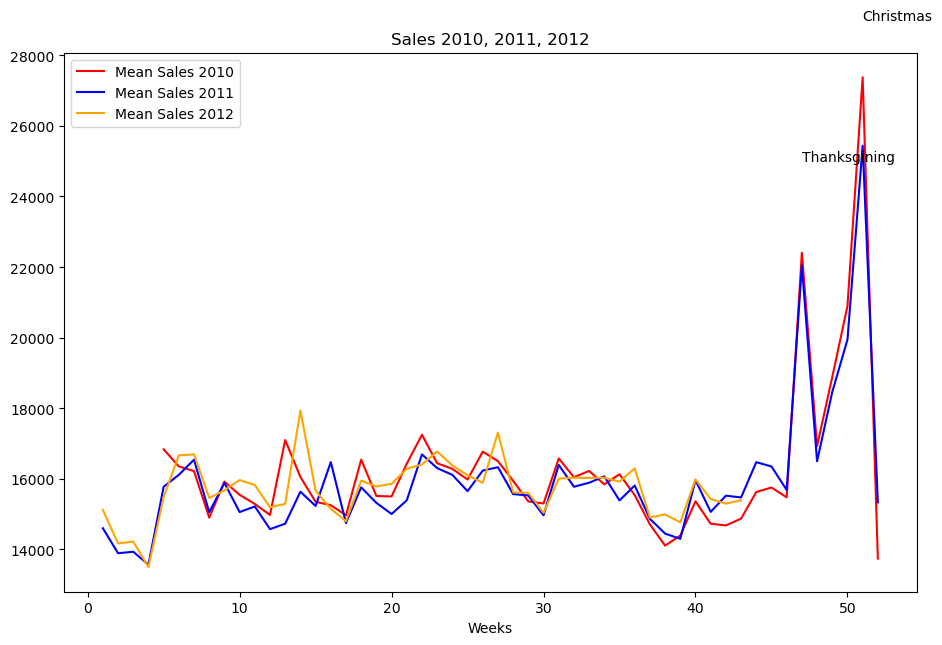

In [550]:
figure = plt.figure(figsize = (11,7))
plt.plot(Weekly_Sales2010['Weekly_Sales']['mean'].index, Weekly_Sales2010['Weekly_Sales']['mean'], color = 'red', label = 'Mean Sales 2010')
plt.plot(Weekly_Sales2011['Weekly_Sales']['mean'].index, Weekly_Sales2011['Weekly_Sales']['mean'], color = 'blue', label = 'Mean Sales 2011')
plt.plot(Weekly_Sales2012['Weekly_Sales']['mean'].index, Weekly_Sales2012['Weekly_Sales']['mean'], color = 'orange', label = 'Mean Sales 2012')
plt.title('Sales 2010, 2011, 2012')
plt.xlabel('Weeks')
plt.text(x = 47, y = 25000, s = 'Thanksgining')
plt.text(x = 51, y = 29000, s = 'Christmas')
plt.legend() 
plt.show()

From the above graph this is very clear that because of thansgiving and christmas the sales has risen up with a huge margin .

Some more analysis on some more features.

In [551]:
# Converting the temperature into celsius for better understanding #
train_df['Temperature'] = train_df['Temperature'].apply(lambda x :  (x - 32) / 1.8)
train_df['Temperature'] = train_df['Temperature'].apply(lambda x :  (x - 32) / 1.8)

In [552]:
df1 = train_df.sample(frac=0.20)

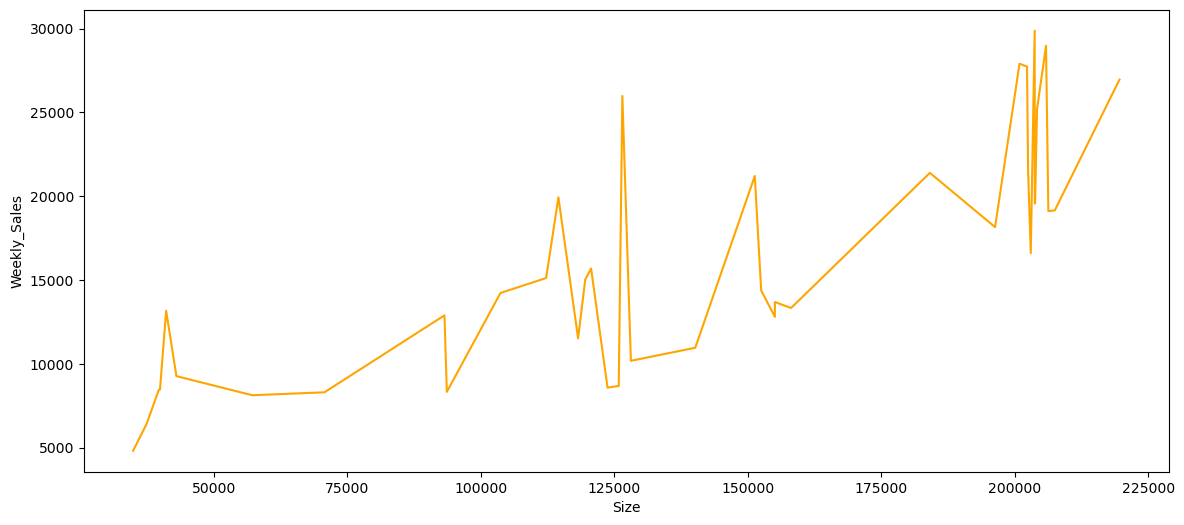

In [553]:
plt.figure(figsize = (14,6))
sizes = df1.groupby('Size').mean()
plt.plot(sizes.index , sizes.Weekly_Sales , color='orange')
plt.xlabel('Size')
plt.ylabel('Weekly_Sales')
plt.show()

**Here you can clearly see that size is an important factor when it comes to sales !!**

In [554]:
depts = df1.groupby('Dept').mean().sort_values(by='Weekly_Sales',ascending=False)

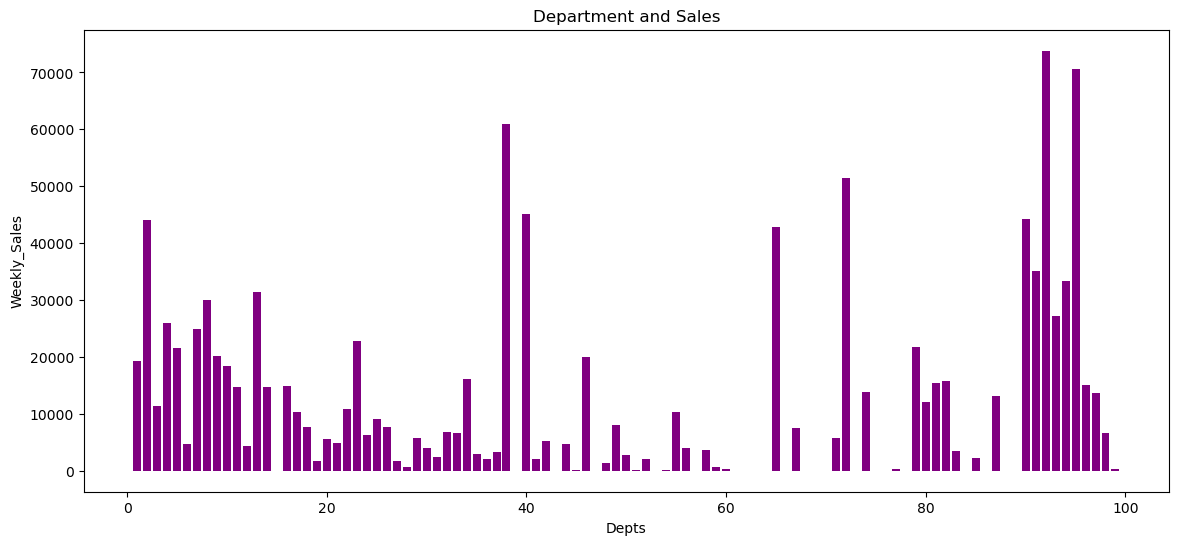

In [555]:
plt.figure(figsize=(14,6))
plt.bar(depts.index, depts.Weekly_Sales,color='purple')
plt.xlabel('Depts')
plt.ylabel('Weekly_Sales')
plt.title('Department and Sales')
plt.show()

**Some departaments contributes to sales more than others**

## Now comes the Feature Engineering part ##

In [556]:
data_train = train_df.copy()
data_test = test_df.copy()

**Since Thanksgiving and christmas are the most important holidays , so we will try some feature enginnerings on these features 
and also Superbowl day and Labor day.**

In [557]:
data_train['Days_to_Thansksgiving'] = (pd.to_datetime(train_df["Year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(train_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
data_train['Days_to_Christmas'] = (pd.to_datetime(train_df["Year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(train_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [558]:
data_test['Days_to_Thansksgiving'] = (pd.to_datetime(test_df["Year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
data_test['Days_to_Christmas'] = (pd.to_datetime(test_df["Year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [559]:
data_train['SuperBowlWeek'] = train_df['Week'].apply(lambda x: 1 if x == 6 else 0)
data_train['LaborDay'] = train_df['Week'].apply(lambda x: 1 if x == 36 else 0)
data_train['Thanksgiving'] = train_df['Week'].apply(lambda x: 1 if x == 47 else 0)
data_train['Christmas'] = train_df['Week'].apply(lambda x: 1 if x == 52 else 0)

In [560]:
data_test['SuperBowlWeek'] = test_df['Week'].apply(lambda x: 1 if x == 6 else 0)
data_test['LaborDay'] = test_df['Week'].apply(lambda x: 1 if x == 36 else 0)
data_test['Thanksgiving'] = test_df['Week'].apply(lambda x: 1 if x == 47 else 0)
data_test['Christmas'] = test_df['Week'].apply(lambda x: 1 if x == 52 else 0)

**Markdowns**

In [561]:
data_train['MarkdownsSum'] = train_df['MarkDown1'] + train_df['MarkDown2'] + train_df['MarkDown3'] + train_df['MarkDown4'] + train_df['MarkDown5']

In [562]:
data_test['MarkdownsSum'] = test_df['MarkDown1'] + test_df['MarkDown2'] + test_df['MarkDown3'] + test_df['MarkDown4'] + test_df['MarkDown5']

**Filling missing values**

In [563]:
data_train.isna().sum()[data_train.isna().sum() > 0].sort_values(ascending=False)

MarkdownsSum    324514
MarkDown2       310322
MarkDown4       286603
MarkDown3       284479
MarkDown1       270889
MarkDown5       270138
dtype: int64

In [564]:
data_test.isna().sum()[data_test.isna().sum() > 0].sort_values(ascending=False)

CPI             38162
Unemployment    38162
MarkdownsSum    37457
MarkDown2       28627
MarkDown4       12888
MarkDown3        9829
MarkDown1         149
dtype: int64

In [565]:
data_train.fillna(0 , inplace=True)

In [566]:
data_test['CPI'].fillna(data_test['CPI'].mean(),inplace=True)
data_test['Unemployment'].fillna(data_test['Unemployment'].mean(),inplace=True)

In [567]:
data_test.fillna(0 ,inplace=True)

## Now we will encode the Categorical data ##

In [568]:
data_train['IsHoliday'] = data_train['IsHoliday'].apply(lambda x: 1 if x == True else 0)
data_test['IsHoliday'] = data_test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [569]:
data_train['Type'] = data_train['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
data_test['Type'] = data_test['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))

## Now comes the features selecting part ##

In [570]:
features = [feature for feature in data_train.columns if feature not in ('Date','Weekly_Sales')]

In [571]:
X = data_train[features].copy()
y = data_train.Weekly_Sales.copy()

In [572]:
X.shape

(421570, 25)

In [573]:
y.shape

(421570,)

In [574]:
data_sample = data_train.copy().sample(frac=0.25)
X_sample = data_sample.drop(['Date','Weekly_Sales'],axis='columns').copy()
y_sample = data_sample.Weekly_Sales.copy()

In [575]:
X_sample.shape

(105392, 25)

In [576]:
y_sample.shape

(105392,)

In [577]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_sample,y_sample,test_size = 0.15, random_state = 0)

In [578]:
from sklearn.ensemble import GradientBoostingRegressor

In [579]:
reg = GradientBoostingRegressor(random_state=0).fit(X_train,y_train)

In [580]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(reg, random_state=1).fit(X_test, y_test)
features = eli5.show_weights(perm, top=len(X_train.columns), feature_names = X_test.columns.tolist())

In [581]:
features_weights = eli5.show_weights(perm, top=len(X_train.columns), feature_names = X_test.columns.tolist())
features_weights

Weight,Feature
1.1769 ± 0.0179,Dept
0.3444 ± 0.0139,Size
0.0443 ± 0.0018,Store
0.0126 ± 0.0007,CPI
0.0097 ± 0.0023,MarkDown3
0.0059 ± 0.0013,Thanksgiving
0.0042 ± 0.0003,Type
0.0035 ± 0.0008,Days_to_Thansksgiving
0.0029 ± 0.0006,Week
0.0025 ± 0.0002,Days_to_Christmas


In [582]:
f_importances = pd.Series(dict(zip(X_test.columns.tolist(), perm.feature_importances_))).sort_values(ascending=False)
f_importances

Dept                     1.176899
Size                     0.344450
Store                    0.044278
CPI                      0.012603
MarkDown3                0.009741
Thanksgiving             0.005913
Type                     0.004222
Days_to_Thansksgiving    0.003534
Week                     0.002900
Days_to_Christmas        0.002529
Unemployment             0.000720
Christmas                0.000671
MarkDown4                0.000165
Day                      0.000060
Month                    0.000049
Temperature              0.000041
MarkDown1                0.000039
SuperBowlWeek            0.000000
IsHoliday                0.000000
LaborDay                 0.000000
MarkDown2                0.000000
Year                     0.000000
Fuel_Price               0.000000
MarkDown5                0.000000
MarkdownsSum            -0.000020
dtype: float64

In [583]:
weights = eli5.show_weights(perm, top=len(X_train.columns), feature_names=X_test.columns.tolist())
result = pd.read_html(weights.data)[0]
result

,Weight,Feature
0,1.1769 ± 0.0179,Dept
1,0.3444 ± 0.0139,Size
2,0.0443 ± 0.0018,Store
3,0.0126 ± 0.0007,CPI
4,0.0097 ± 0.0023,MarkDown3
5,0.0059 ± 0.0013,Thanksgiving
6,0.0042 ± 0.0003,Type
7,0.0035 ± 0.0008,Days_to_Thansksgiving
8,0.0029 ± 0.0006,Week
9,0.0025 ± 0.0002,Days_to_Christmas


In [584]:
def WMAE(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [585]:
models = {
          '  GBoost': ensemble.GradientBoostingRegressor(random_state = 0, loss = 'squared_error'),           
          '    HGBR': HistGradientBoostingRegressor(random_state = 0),
          ' ExtraTr': ensemble.ExtraTreesRegressor(bootstrap = True, random_state = 0),
          ' RandomF': ensemble.RandomForestRegressor(random_state = 0),
         }

In [586]:
def model_evaluation (name, model, models, X_train, y_train, X_test, y_test):
   
    rmses = []
    
    for i in range(len(models)):
    
        # Model fit
        model.fit(X_train, y_train)
        
        # Model predict
        y_preds = model.predict(X_test)

        # RMSE
        rmse = np.sqrt(np.mean((y_test - y_preds)**2))
        rmses.append(rmse)
        
    return np.mean(rmses)

In [587]:
for name, model in models.items():
    print(name + ' Valid RMSE {:.4f}'.format(model_evaluation(name, model, models,  X_train, y_train, X_test, y_test)))

  GBoost Valid RMSE 11050.5301
    HGBR Valid RMSE 6889.6695
 ExtraTr Valid RMSE 5034.9748
 RandomF Valid RMSE 4200.4336


**Seems to be RandomForest it's the best baseline model by default, followed by ExtraTrees, but you can improve the score of boosting models by doing hyperparameter optimization.**

**Estabilishing a baseline with the model**

In [599]:
X_baseline = X[['Store','Dept','IsHoliday','Size','Week','Type','Year','Day']].copy()

In [600]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_baseline, y, random_state=0, test_size=0.1)

In [601]:
RF = ensemble.RandomForestRegressor(n_estimators=60, max_depth=25, min_samples_split=3, min_samples_leaf=1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, min_samples_split=3, n_estimators=60)

In [602]:
test = data_test[['Store','Dept','IsHoliday','Size','Week','Type','Year','Day']].copy()
predict_rf = RF.predict(test)

In [603]:
sample_submission['Weekly_Sales'] = predict_rf
sample_submission.to_csv('submission_by_Arpit_Subhash.csv',index=False)

**Now we will blend baseline with the two best models i.e RandomForest and ExtraTrees.**

In [604]:
etr = ensemble.ExtraTreesRegressor(n_estimators=50, bootstrap = True, random_state = 0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=True, n_estimators=50, random_state=0)

In [605]:
predict_etr = etr.predict(test)

In [606]:
avg_predicts = (predict_rf + predict_etr)/2

In [607]:
sample_submission['Weekly_Sales'] = avg_predicts
sample_submission.to_csv('submission2_by_Arpit_subhash.csv',index=False)